# Deep Learning final project

**Ricardo Fernandez**

**Oscar Romero**

# Data preprocesing

## Custom data set creation Overview

dataset_creator creates a music sentiment dataset, segmenting input audio files into 10-second chunks and associating each segment with sentiments (Epic, Happy, Sad, Suspense). It leverages `PyTorch's Dataset ` and the `librosa library `. The script organizes segments into an output folder and generates a CSV file (all_music_labels.csv) containing metadata such as file names and sentiments. The dataset structure is tailored for sentiment analysis tasks. Users can customize input audio paths, sentiments, and output locations. The code uses the pydub library for audio processing and pandas for CSV creation, providing a convenient approach to building labeled music datasets for sentiment analysis.
This data set is going to be used for some classification tasks.

## Audio Datasets Overview

audio_datasets provides utility classes for audio datasets used with the CLAP (Contrastive Learning of Audio Representations) model. The classes leverage PyTorch's `Dataset` and the `librosa` library for audio processing.

### Dataset Overview:

1. **ESC50Dataset:**
   - Contains environmental sound recordings.
   - Metadata includes categories like "dog bark," "rain," etc.


2. **GTZANDataset:**
   - Contains audio tracks from the GTZAN music genre dataset.
   - Metadata includes genres such as "blues," "pop," etc.


3. **MusicSentimentDataset:**
   - Contains audio clips labeled with sentiment (e.g., happy, sad).
   - Metadata includes sentiment labels and filenames.
   

### Usage Example:

To use these classes, instantiate an object of the desired dataset class, providing the path to the metadata CSV file and the directory containing audio files. Access audio samples, display waveforms, play audio, and more.

Example:
```python
# Instantiate ESC50Dataset
esc50_dataset = ESC50Dataset(metadata_path='path/to/esc50_metadata.csv', audio_dir='path/to/audio/files')

# Display waveform of the first audio file
esc50_dataset.display_waveform(idx=0)

# Play audio in Jupyter notebook
esc50_dataset.play_audio_in_jupyter(idx=0)


# State of the Art Replication 

This section aims to replicate and extend state-of-the-art experiments in audio classification using the Contrastive Learning of Audio Representations (CLAP) model. Leveraging `PyTorch`, `librosa` , and the Hugging Face transformers library, we replicate experiments on two widely used audio datasets: ESC50 and GTZAN. Our approach encompasses zero-shot classification, fusion, and infusion techniques utilizing different CLAP pre-trained models. We explore the effectiveness of contrastive learning in capturing rich audio representations, comparing the performance of distinct transformer architectures. The experiments serve as a foundation for further investigations and custom applications in audio analysis

## Audio Classifier Overview

The `AudioClassifier` class facilitates audio classification experiments using the CLAP (Contrastive Learning of Audio Representations) model. This class is equipped with functionalities for dataset initialization, model loading, prediction, and evaluation.

### Example of usage
```python
audio_classifier = AudioClassifier(
    metadata_path='path/to/metadata.csv',
    audio_dir='path/to/audio/files',
    dataset_class='ESC50',
    model_id='laion/clap-htsat-fused',
    text_augmentation=True
)


good_predictions, bad_predictions, accuracy, true_labels, pred_labels = audio_classifier.predict_and_evaluate(batch_size=32)
audio_classifier.plot_predictions_by_class(good_predictions, bad_predictions)
audio_classifier.get_confusion_matrix(true_labels, pred_labels)

In [1]:
import os
os.chdir('/Users/oscar/repositories/Deep-Learning-CLAP')


In [2]:
import sys
sys.path.append('/Users/oscar/repositories/Deep-Learning-CLAP')


## ESC 50 Zero Shot classification

Running model: laion/clap-htsat-fused over dataset: ESC50 with length: 2000


  0%|          | 0/63 [00:00<?, ?it/s]

After running zero-shot classification over 2000 samples on ESC50 dataset, the accuracy is: 0.831


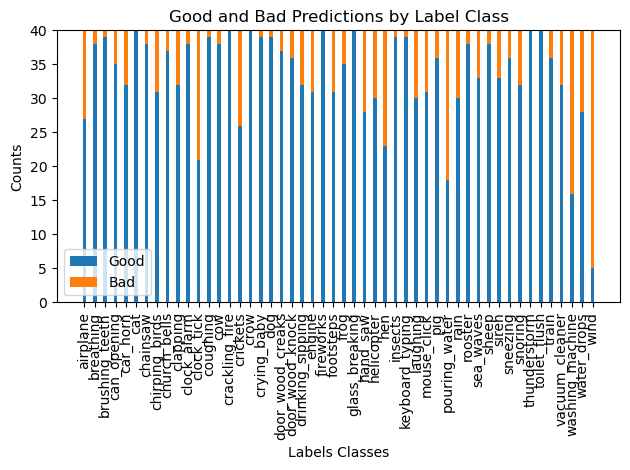

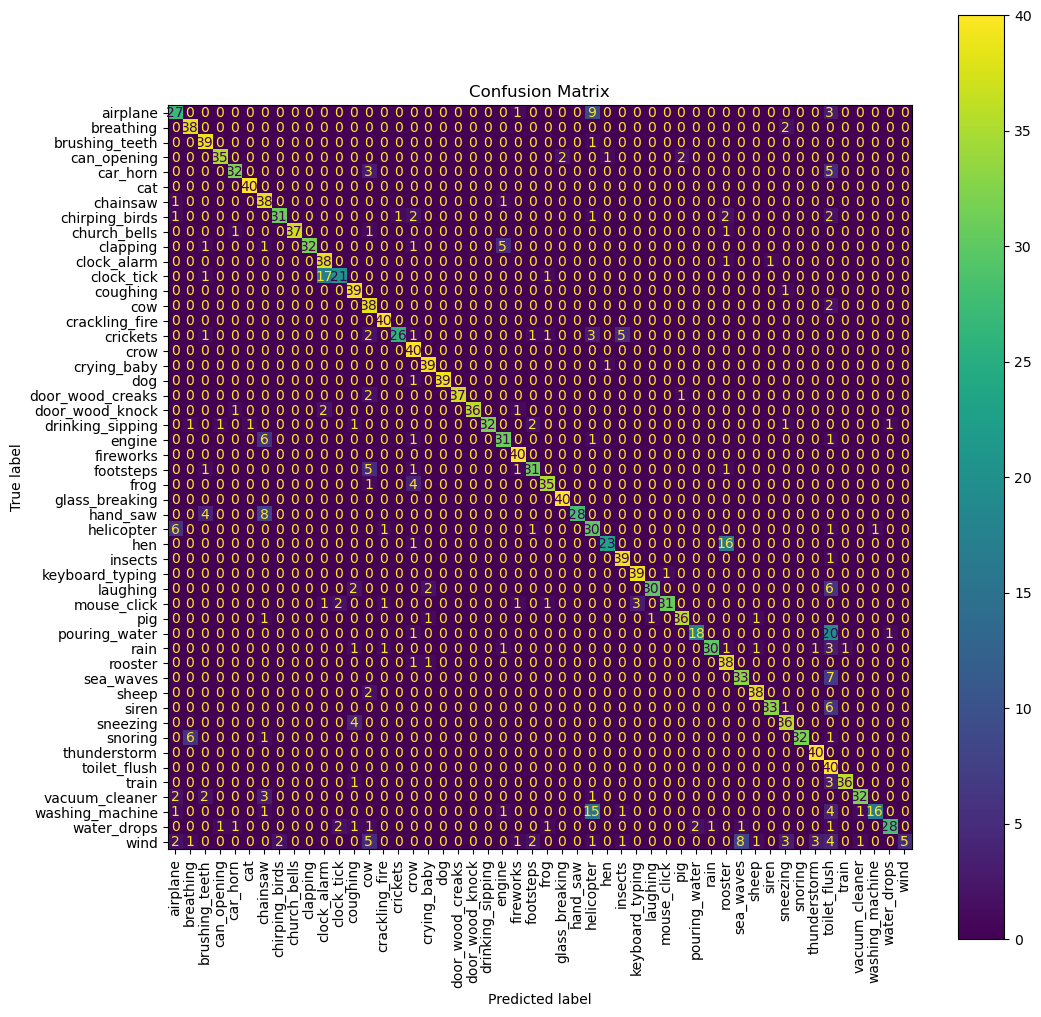

In [3]:
## ZERO SHOT ESC 50_ htsat-fused, no text augmentation

from audio_classification import AudioClassifier

esc50_zs_fus = AudioClassifier(
    metadata_path = "/homes/r23ferna/Documents/ESC-50-master/meta/esc50.csv",
    audio_dir = "/homes/r23ferna/Documents/ESC-50-master/audio",
    dataset_class = 'ESC50',
    model_id = "laion/clap-htsat-fused",
    text_augmentation= False)

good_predictions_esc50_zs_fus, bad_predictions_esc50_zs_fus, accuaracy_esc50_zs_fus, true_labels_esc50_zs_fus, pred_labels_esc50_zs_fus = esc50_zs_fus.predict_and_evaluate(
    batch_size=32)
esc50_zs_fus.plot_predictions_by_class(good_predictions_esc50_zs_fus, bad_predictions_esc50_zs_fus)
esc50_zs_fus.get_confusion_matrix(true_labels_esc50_zs_fus, pred_labels_esc50_zs_fus)

preprocessor_config.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/5.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/615M [00:00<?, ?B/s]

Running model: laion/clap-htsat-unfused over dataset: ESC50 with length: 2000


  0%|          | 0/63 [00:00<?, ?it/s]

After running zero-shot classification over 2000 samples on ESC50 dataset, the accuracy is: 0.891


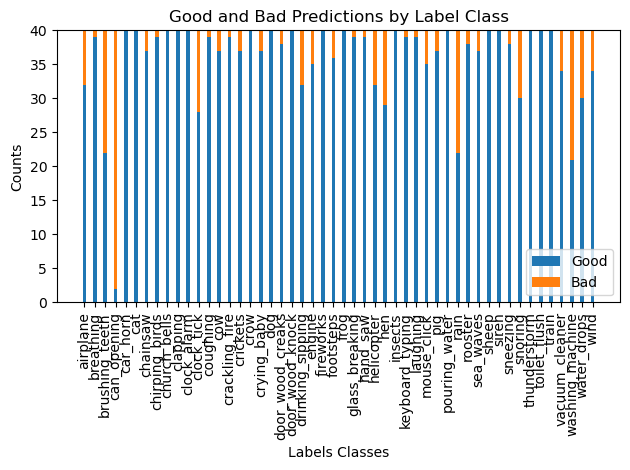

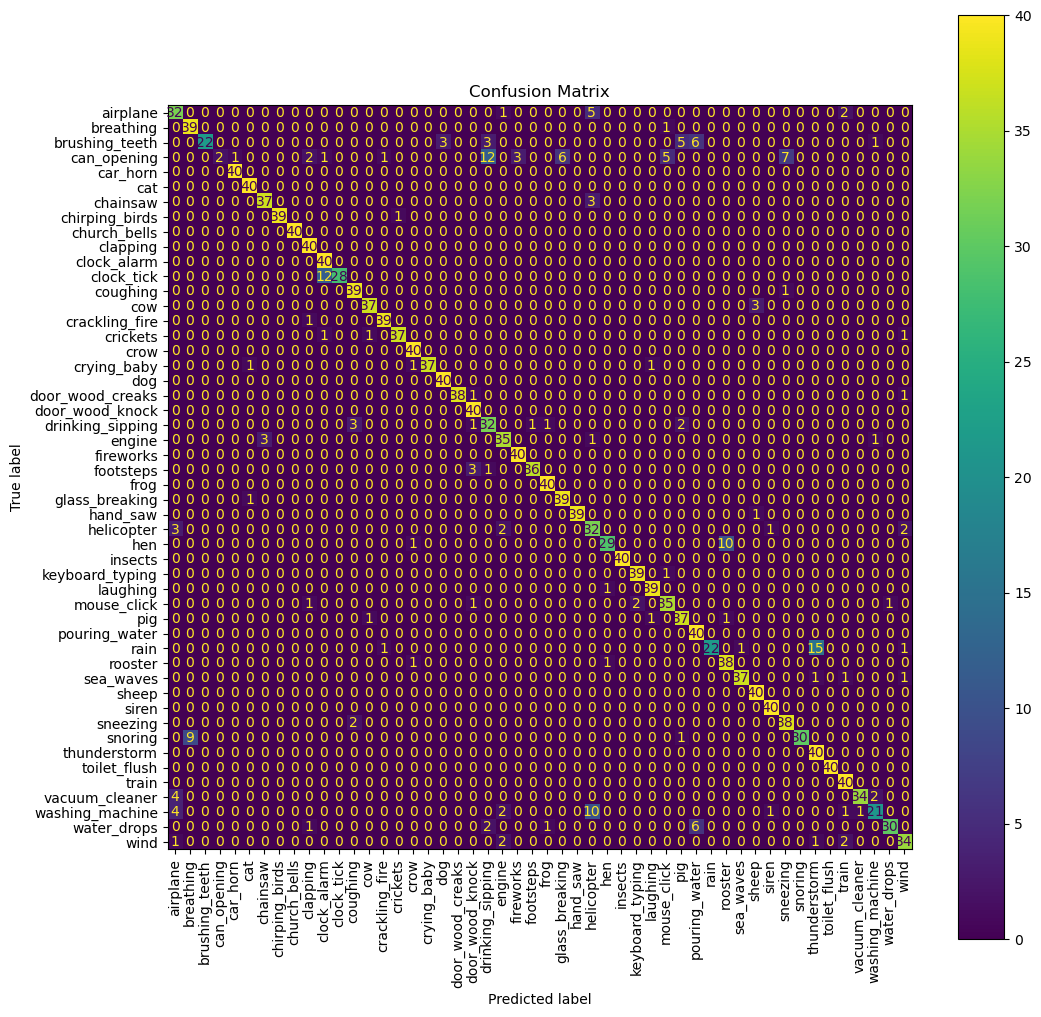

In [4]:
## ZERO SHOT ESC050 htsat-unfused, no text augmentation

from audio_classification import AudioClassifier

esc50_zs_unf = AudioClassifier(
    metadata_path = "/homes/r23ferna/Documents/ESC-50-master/meta/esc50.csv",
    audio_dir = "/homes/r23ferna/Documents/ESC-50-master/audio",
    dataset_class = 'ESC50',
    model_id = "laion/clap-htsat-unfused",
    text_augmentation= False)

good_predictions_esc50_zs_unf, bad_predictions_esc50_zs_unf, accuaracy_esc50_zs_unf, true_labels_esc50_zs_unf, pred_labels_esc50_zs_unf = esc50_zs_unf.predict_and_evaluate(
    batch_size=32)
esc50_zs_unf.plot_predictions_by_class(good_predictions_esc50_zs_unf, bad_predictions_esc50_zs_unf)
esc50_zs_unf.get_confusion_matrix(true_labels_esc50_zs_unf, pred_labels_esc50_zs_unf)

Running model: laion/clap-htsat-unfused over dataset: ESC50 with length: 2000


  0%|          | 0/63 [00:00<?, ?it/s]

After running zero-shot classification over 2000 samples on ESC50 dataset, the accuracy is: 0.8925


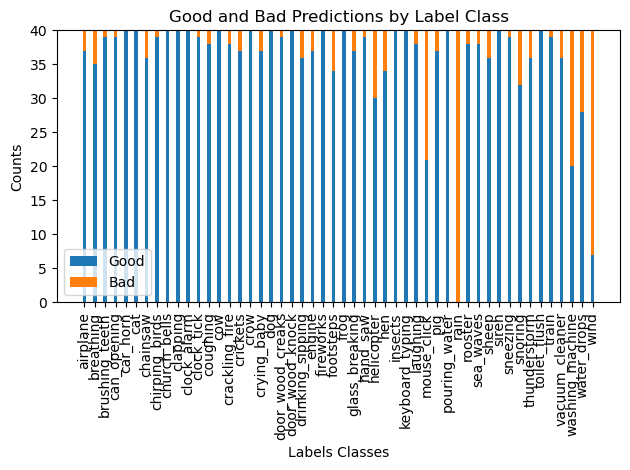

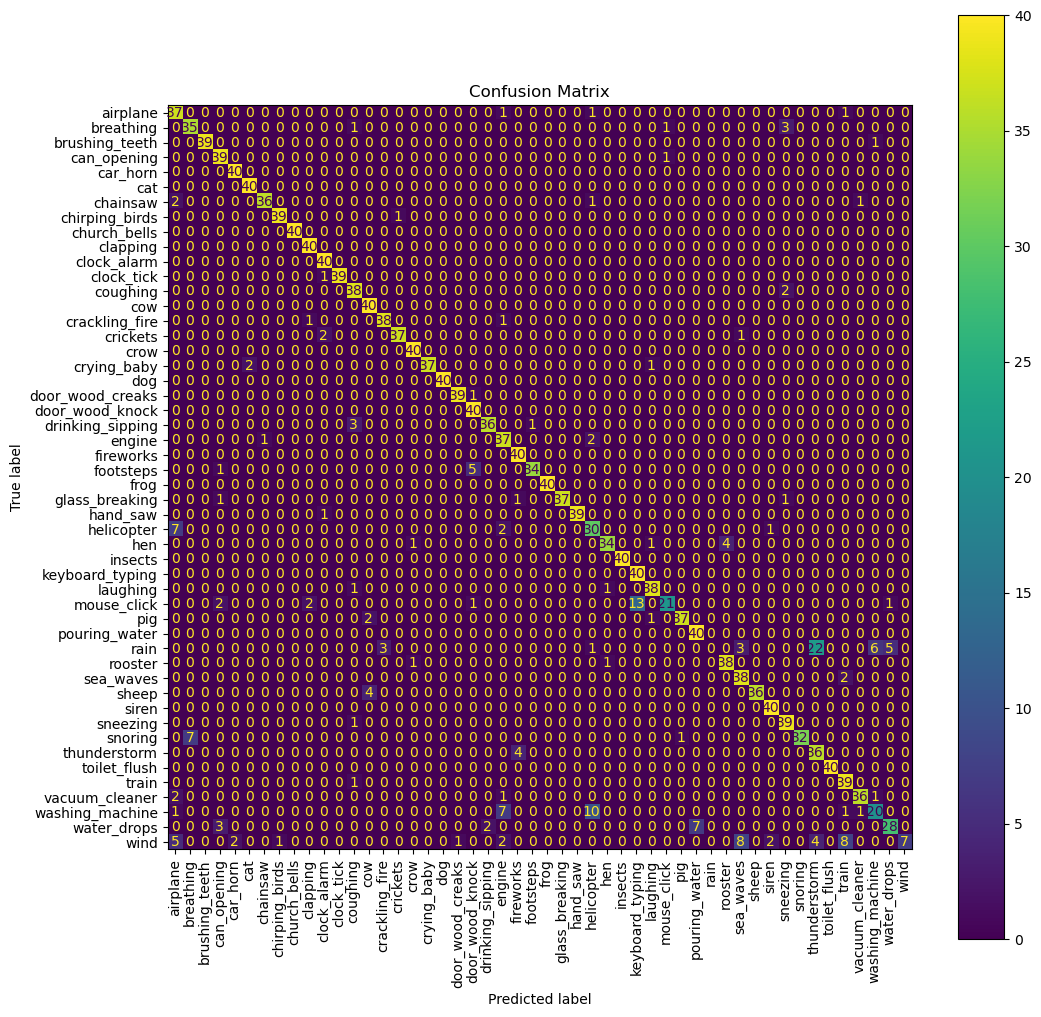

In [5]:
## ZERO SHOT ESC050 htsat-unfused, text augmentation

from audio_classification import AudioClassifier

esc50_zs_unf_aug = AudioClassifier(
    metadata_path = "/homes/r23ferna/Documents/ESC-50-master/meta/esc50.csv",
    audio_dir = "/homes/r23ferna/Documents/ESC-50-master/audio",
    dataset_class = 'ESC50',
    model_id = "laion/clap-htsat-unfused",
    text_augmentation= True)

good_predictions_esc50_zs_unf_aug, bad_predictions_esc50_zs_unf_aug, accuaracy_esc50_zs_unf_aug, true_labels_esc50_zs_unf_aug, pred_labels_esc50_zs_unf_aug = esc50_zs_unf_aug.predict_and_evaluate(
    batch_size=32)
esc50_zs_unf_aug.plot_predictions_by_class(good_predictions_esc50_zs_unf_aug, bad_predictions_esc50_zs_unf_aug)
esc50_zs_unf_aug.get_confusion_matrix(true_labels_esc50_zs_unf_aug, pred_labels_esc50_zs_unf_aug)

## GTZAN Zero Shot genres classification

###  GTZAN Zeroshot larger_clap_music

Running model: laion/larger_clap_music_and_speech over dataset: GTZAN with length: 1000


  0%|          | 0/32 [00:00<?, ?it/s]

After running zero-shot classification over 1000 samples on GTZAN dataset, the accuracy is: 0.357


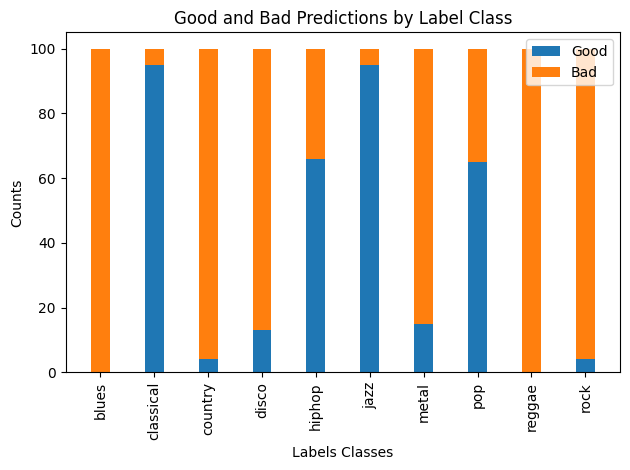

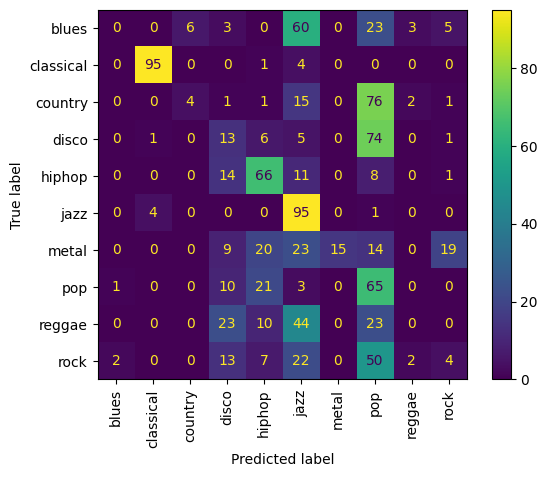

In [8]:
from audio_classification import AudioClassifier

GT_zs_lcm = AudioClassifier(
    metadata_path = "audios/GTZAN/features_30_sec.csv",
    audio_dir = "audios/GTZAN/genres_original",
    dataset_class = 'GTZAN',
    model_id = "laion/larger_clap_music_and_speech",
    text_augmentation= True)

good_predictions_GT_zs_lcm, bad_predictions_GT_zs_lcm, accuaracy_GT_zs_lcm, true_labels_GT_zs_lcm, pred_labels_GT_zs_lcm = GT_zs_lcm.predict_and_evaluate(
    batch_size=32)
GT_zs_lcm.plot_predictions_by_class(good_predictions_GT_zs_lcm, bad_predictions_GT_zs_lcm)
GT_zs_lcm.get_confusion_matrix(true_labels_GT_zs_lcm, pred_labels_GT_zs_lcm)


### GTZAN Zeroshot larger_clap_music_and_speech

Running model: laion/larger_clap_music over dataset: GTZAN with length: 1000


  0%|          | 0/32 [00:00<?, ?it/s]

After running zero-shot classification over 1000 samples on GTZAN dataset, the accuracy is: 0.1


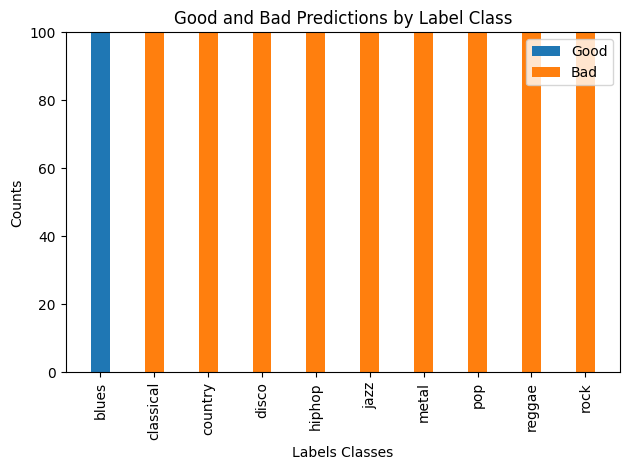

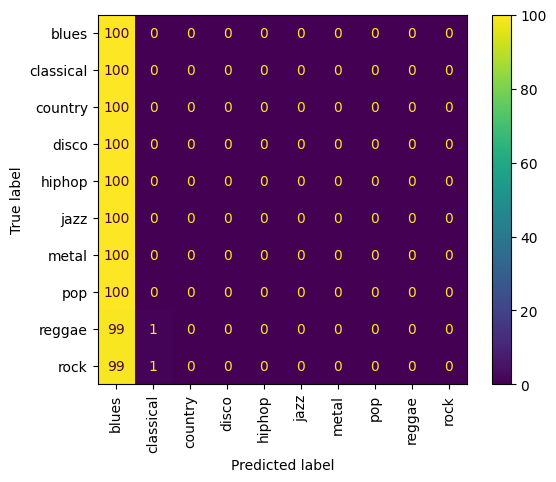

In [9]:
from audio_classification import AudioClassifier

GT_zs_lcmspch = AudioClassifier(
    metadata_path = "audios/GTZAN/features_30_sec.csv",
    audio_dir = "audios/GTZAN/genres_original",
    dataset_class = 'GTZAN',
    model_id = "laion/larger_clap_music",
    text_augmentation= True)

good_predictions_GT_zs_lcmspch, bad_predictions_GT_zs_lcmspch, accuaracy_GT_zs_lcmspch, true_labels_GT_zs_lcmspch, pred_labels_GT_zs_lcmspch = GT_zs_lcmspch.predict_and_evaluate(
    batch_size=32)
GT_zs_lcmspch.plot_predictions_by_class(good_predictions_GT_zs_lcmspch, bad_predictions_GT_zs_lcmspch)
GT_zs_lcmspch.get_confusion_matrix(true_labels_GT_zs_lcmspch, pred_labels_GT_zs_lcmspch)

## Text to audio Retreival

### ESC50 enviromental sounds text query

In [11]:
from audio_datasets.audio_dataset import ESC50Dataset, GTZANDataset, MusicSentimentDataset
from text_to_audio import Text2Audio
metadata_path = "/homes/r23ferna/Documents/ESC-50-master/meta/esc50.csv"
audio_dir = "/homes/r23ferna/Documents/ESC-50-master/audio"
dataset_class = 'ESC50'
model_id = "laion/clap-htsat-unfused"
text_query = "a dog barking loud" # We can put any query

# model_id = "laion/larger_clap_music"

# Initialize the Text2Audio
text2audio = Text2Audio(metadata_path, audio_dir, dataset_class, model_id, text_query)

# Get audio embeddings
audio_embeddings = text2audio.get_audio_embeddings()

# Get similarities
similarities = text2audio.get_similarities(audio_embeddings)

# Get top indices
top_indices = text2audio.get_top_indices(similarities, k=5)

# Print the top 5 most similar audio files and their similarity scores
for idx in top_indices:
    print(f"Cosine Similarity: {similarities[idx]}")
    print(f"Audio file: {text2audio.dataset.filenames[idx]}")
    print(f"Label: {text2audio.dataset.labels[idx]}")
    print(f"Index: {idx}")    
    print("")
text2audio.dataset.play_audio_in_jupyter(top_indices[0])
    

processing audio files:   0%|          | 0/2000 [00:00<?, ?it/s]

Cosine Similarity: tensor([0.6101], device='cuda:0')
Audio file: 4-192236-A-0.wav
Label: dog
Index: 1484

Cosine Similarity: tensor([0.5853], device='cuda:0')
Audio file: 2-118964-A-0.wav
Label: dog
Index: 503

Cosine Similarity: tensor([0.5713], device='cuda:0')
Audio file: 5-212454-A-0.wav
Label: dog
Index: 1800

Cosine Similarity: tensor([0.5636], device='cuda:0')
Audio file: 4-183992-A-0.wav
Label: dog
Index: 1431

Cosine Similarity: tensor([0.5606], device='cuda:0')
Audio file: 2-122104-B-0.wav
Label: dog
Index: 522


### Music Genres generated data song query

In [5]:
from audio_datasets.audio_dataset import ESC50Dataset, GTZANDataset, MusicSentimentDataset
from text_to_audio import Text2Audio
metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/all_music_labels.csv"
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/"
dataset_class = 'MusicGen'
model_id = "laion/larger_clap_music_and_speech" 
text_query = "Pop song with catchy melodies and a repetitive chorus" # We can put any query

# model_id = "laion/larger_clap_music"

# Initialize the Text2Audio
text2audio = Text2Audio(metadata_path, audio_dir, dataset_class, model_id, text_query)

# Get audio embeddings
audio_embeddings = text2audio.get_audio_embeddings()

# Get similarities
similarities = text2audio.get_similarities(audio_embeddings)

# Get top indices
top_indices = text2audio.get_top_indices(similarities, k=5)


processing audio files:   0%|          | 0/2500 [00:00<?, ?it/s]

In [7]:
# Print the top 5 most similar audio files and their similarity scores
for idx in top_indices:
    print(f"Cosine Similarity: {similarities[idx]}")
    print(f"Audio file: {text2audio.dataset.filenames[idx]}")
    print(f"Label: {text2audio.dataset.labels[idx]}")
    print(f"Index: {idx}")    
    print("")
text2audio.dataset.play_audio_in_jupyter(top_indices[0])
    

Cosine Similarity: tensor([0.5910], device='cuda:0')
Audio file: audio_segment_670.wav
Label: country
Index: 669

Cosine Similarity: tensor([0.5834], device='cuda:0')
Audio file: audio_segment_1763.wav
Label: pop
Index: 1762

Cosine Similarity: tensor([0.5710], device='cuda:0')
Audio file: audio_segment_669.wav
Label: country
Index: 668

Cosine Similarity: tensor([0.5708], device='cuda:0')
Audio file: audio_segment_1774.wav
Label: pop
Index: 1773

Cosine Similarity: tensor([0.5693], device='cuda:0')
Audio file: audio_segment_1765.wav
Label: pop
Index: 1764


In [3]:
from text_to_audio import Text2Audio
metadata_path = "audios/GTZAN/features_30_sec.csv"
audio_dir = "audios/GTZAN/genres_original"
dataset_class = 'GTZAN'
model_id = "laion/larger_clap_music_and_speech" 
text_query = "A Jazz Song" # We can put any query

# Initialize the Text2Audio
text2audio = Text2Audio(metadata_path, audio_dir, dataset_class, model_id, text_query)

# Get audio embeddings
audio_embeddings = text2audio.get_audio_embeddings()

# Get similarities
similarities = text2audio.get_similarities(audio_embeddings)

# Get top indices
top_indices = text2audio.get_top_indices(similarities, k=5)
for idx in top_indices:
    print(f"Cosine Similarity: {similarities[idx]}")
    print(f"Audio file: {text2audio.dataset.filenames[idx]}")
    print(f"Label: {text2audio.dataset.labels[idx]}")
    print(f"Index: {idx}")    
    print("")
text2audio.dataset.play_audio_in_jupyter(top_indices[0])

/Users/oscar/repositories/Deep-Learning-CLAP/venv-clap/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


processing audio files:   0%|          | 0/1000 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Cosine Similarity: tensor([0.5663])
Audio file: jazz.00006.wav
Label: jazz
Index: 506

Cosine Similarity: tensor([0.5560])
Audio file: blues.00052.wav
Label: blues
Index: 52

Cosine Similarity: tensor([0.5421])
Audio file: jazz.00076.wav
Label: jazz
Index: 576

Cosine Similarity: tensor([0.5305])
Audio file: jazz.00074.wav
Label: jazz
Index: 574

Cosine Similarity: tensor([0.5290])
Audio file: jazz.00007.wav
Label: jazz
Index: 507


# Experiments

## Zero Shot Classification for Sentiments in music 

We will run a test using the pretrained transformer from CLAP, that gives the best result for clasifying genres in the GTZAN data set, tryin to achieve a sentiment classification, using our created data set `MusicSentiment` Dataset.


Running model: laion/larger_clap_music_and_speech over dataset: MusicSentiment with length: 1626


  0%|          | 0/51 [00:00<?, ?it/s]

After running zero-shot classification over 1626 samples on MusicSentiment dataset, the accuracy is: 0.6143911439114391


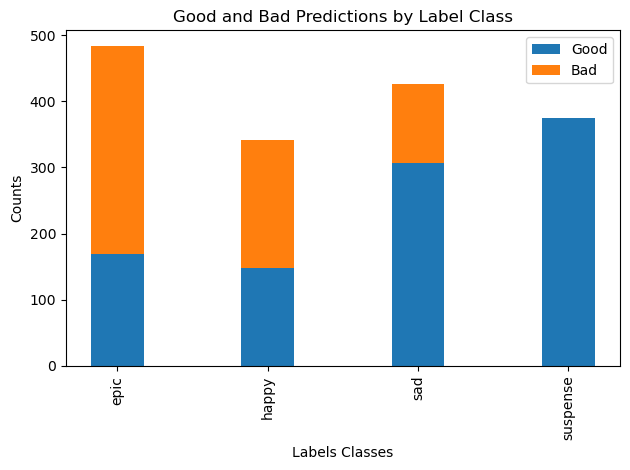

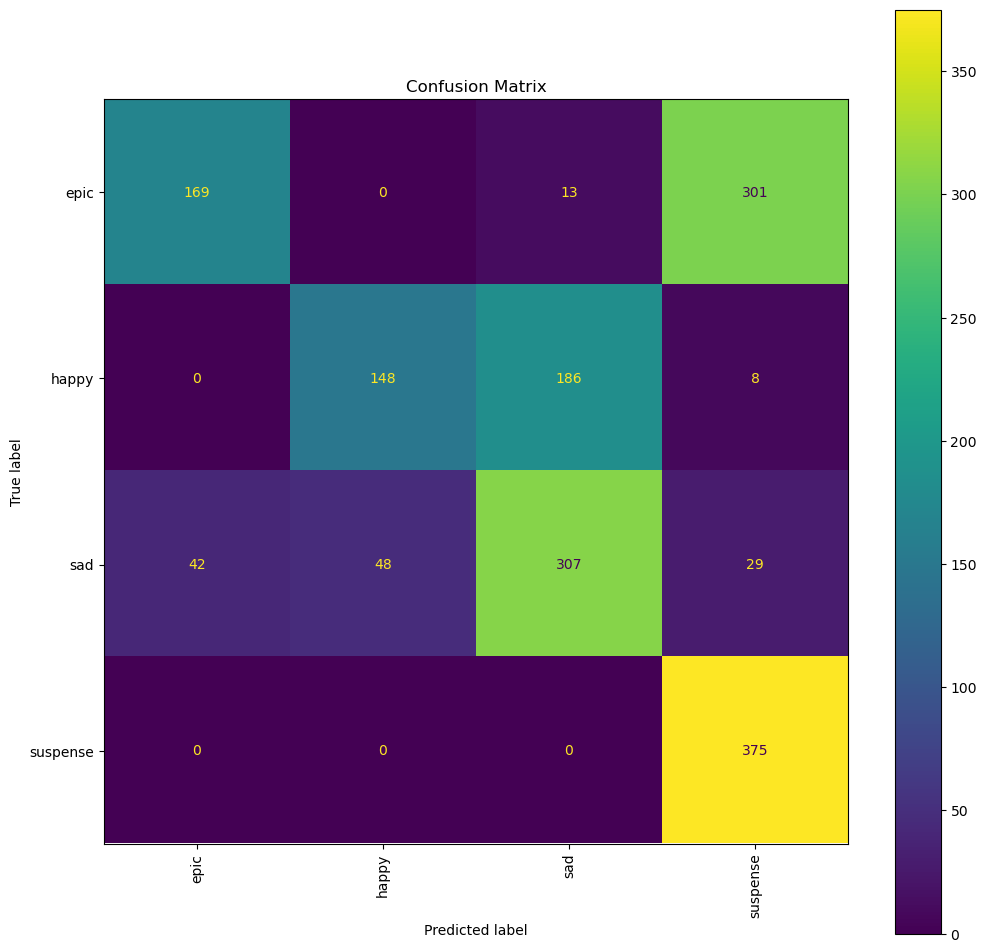

In [13]:
from audio_classification import AudioClassifier
MusicSentiment_zs = AudioClassifier(
metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/SentimentsDataSet/all_music_labels.csv",
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/SentimentsDataSet/",
dataset_class = 'MusicSentiment',
model_id = "laion/larger_clap_music_and_speech", 
text_augmentation= True)


good_predictions_MusicSentiment_zs, bad_predictions_MusicSentiment_zs, accuaracy_MusicSentiment_zs, true_labels_MusicSentiment_zs, pred_labels_MusicSentiment_zs = MusicSentiment_zs.predict_and_evaluate(
    batch_size=32)
MusicSentiment_zs.plot_predictions_by_class(good_predictions_MusicSentiment_zs, bad_predictions_MusicSentiment_zs)
MusicSentiment_zs.get_confusion_matrix(true_labels_MusicSentiment_zs, pred_labels_MusicSentiment_zs)

## Zero Shot genres classifier for generated data set

In [17]:
import torch


Running model: laion/larger_clap_music_and_speech over dataset: MusicGen with length: 2500


  0%|          | 0/79 [00:00<?, ?it/s]

After running zero-shot classification over 2500 samples on MusicGen dataset, the accuracy is: 0.6232


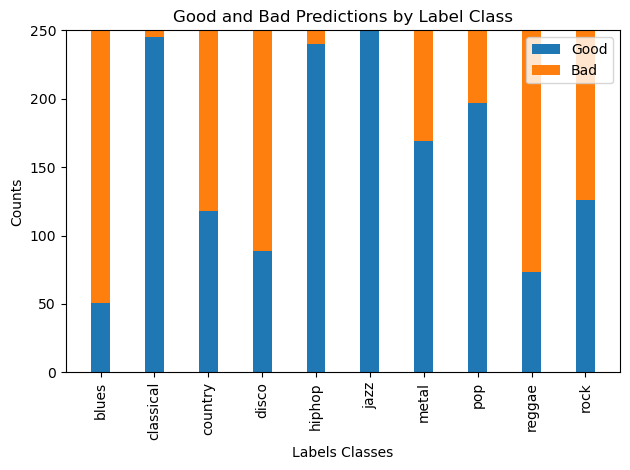

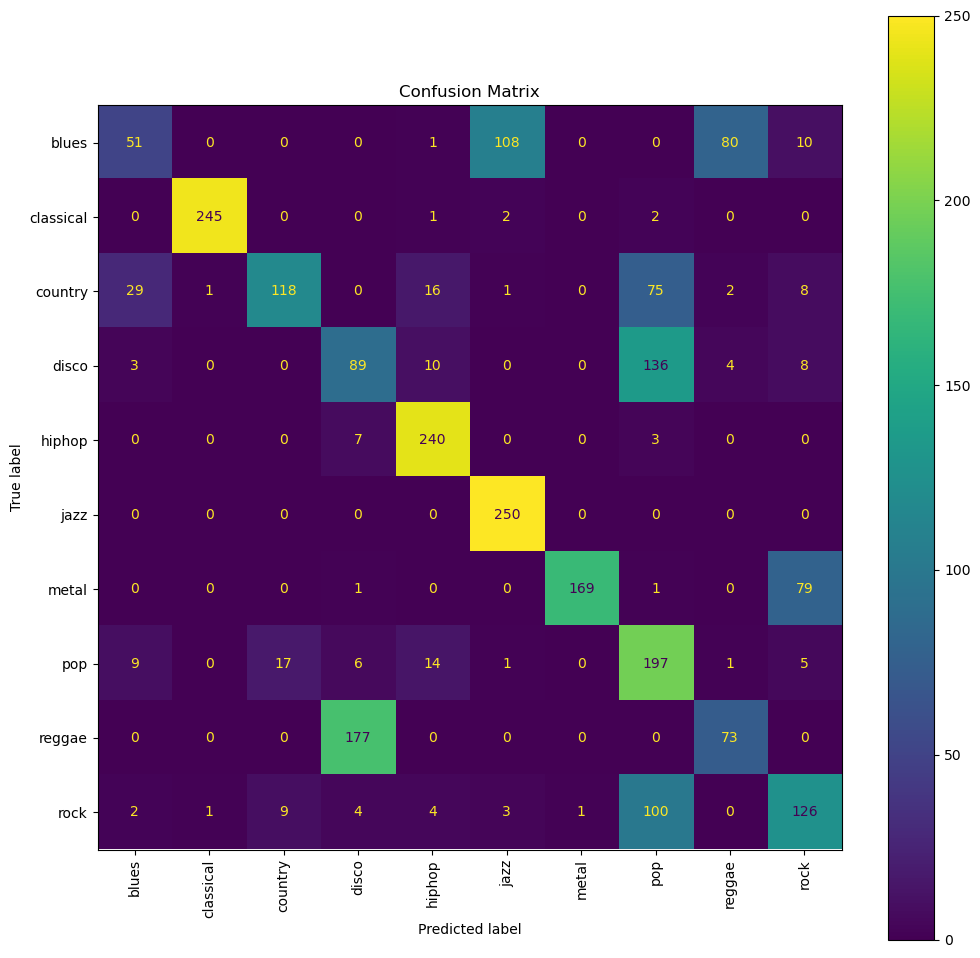

In [16]:
from audio_classification import AudioClassifier

MusicSentiment_zs = AudioClassifier(
metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/all_music_labels.csv",
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/",
dataset_class = "MusicGen",
model_id = "laion/larger_clap_music_and_speech", 
text_augmentation= True)

good_predictions_MusicSentiment_zs, bad_predictions_MusicSentiment_zs, accuaracy_MusicSentiment_zs, true_labels_MusicSentiment_zs, pred_labels_MusicSentiment_zs = MusicSentiment_zs.predict_and_evaluate(
    batch_size=32)
MusicSentiment_zs.plot_predictions_by_class(good_predictions_MusicSentiment_zs, bad_predictions_MusicSentiment_zs)
MusicSentiment_zs.get_confusion_matrix(true_labels_MusicSentiment_zs, pred_labels_MusicSentiment_zs)

As we can see, the ZeroShot classification tasks were relativly high, considering is new data for the pretrained model, also we can see that there are some categories, for example ` Hip Hop ` and ` Jazz ` are close to be perfectly identified.

## Fine-Tune Audio Classifier Overview

The provided code introduces a `FineTuneAudioClassifier` class for fine-tuning a pre-trained CLAP (Contrastive Learning of Audio Representations) model. Key components include:

- Loading audio datasets (`ESC50`, `GTZAN`, or `MusicSentiment`) using respective classes.
- Initializing the CLAP processor and model.
- Handling data splitting for training, testing, and validation.
- Freezing and unfreezing model parameters for efficient training.
- Utilizing PyTorch, Transformers, and other libraries for implementation.

#### Running the Experiments

1. Initialize the `FineTuneAudioClassifier` class with dataset details and the pre-trained CLAP model.
2. Prepare datasets using the `prepare_datasets` method.
3. Define the classifier model, for example, using `nn.Linear`.
4. Train the model using the `train` method, specifying hyperparameters like `num_epochs`, `batch_size`, and `lr`.
5. Evaluate the trained model using the `evaluate` method.
6. Visualize training and validation losses with `plot_loss` and confusion matrices with `plot_confusion_matrix`.
7. Further analysis can be performed, such as predicting and evaluating specific batches.

Example:

```python
# Initialize the FineTuneAudioClassifier
metadata_path = "audios/GTZAN/features_30_sec.csv"
audio_dir = "audios/GTZAN/genres_original"
dataset_class = 'GTZAN'
model_id = "laion/larger_clap_music_and_speech"
fine_tune_audio_classifier = FineTuneAudioClassifier(metadata_path, audio_dir, dataset_class, model_id)

# Prepare datasets
fine_tune_audio_classifier.prepare_datasets()

# Define the classifier model
classifier = nn.Linear(512, fine_tune_audio_classifier.num_classes)

# Train the model
train_losses, valid_losses = fine_tune_audio_classifier.train(classifier, num_epochs=2)

# Evaluate the model
avg_loss, accuracy, true_labels, pred_labels = fine_tune_audio_classifier.evaluate(classifier)

# Plot loss and confusion matrix
fine_tune_audio_classifier.plot_loss(train_losses, valid_losses)
fine_tune_audio_classifier.plot_confusion_matrix(true_labels, pred_labels)


## GTZAN Fine tune Classification

Running GTZAN dataset with lenght: 1000 classifying this number of clases: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Classes in the test set: {'reggae', 'pop', 'metal', 'hiphop', 'country', 'classical', 'jazz', 'blues', 'disco', 'rock'}
Classes in the test set: {'reggae', 'metal', 'pop', 'hiphop', 'country', 'classical', 'jazz', 'rock', 'disco', 'blues'}


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch [1/5], Training Loss: 0.05364762872457504
Classes in the test set: {'reggae', 'pop', 'metal', 'hiphop', 'country', 'classical', 'jazz', 'blues', 'disco', 'rock'}
Classes in the test set: {'reggae', 'metal', 'pop', 'hiphop', 'country', 'classical', 'jazz', 'rock', 'disco', 'blues'}


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch [2/5], Training Loss: 0.03107220068573952
Classes in the test set: {'reggae', 'pop', 'metal', 'hiphop', 'country', 'classical', 'jazz', 'blues', 'disco', 'rock'}
Classes in the test set: {'reggae', 'metal', 'pop', 'hiphop', 'country', 'classical', 'jazz', 'rock', 'disco', 'blues'}


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch [3/5], Training Loss: 0.025690254122018814
Classes in the test set: {'reggae', 'pop', 'metal', 'hiphop', 'country', 'classical', 'jazz', 'blues', 'disco', 'rock'}
Classes in the test set: {'reggae', 'metal', 'pop', 'hiphop', 'country', 'classical', 'jazz', 'rock', 'disco', 'blues'}


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch [4/5], Training Loss: 0.0219238106533885
Classes in the test set: {'reggae', 'pop', 'metal', 'hiphop', 'country', 'classical', 'jazz', 'blues', 'disco', 'rock'}
Classes in the test set: {'reggae', 'metal', 'pop', 'hiphop', 'country', 'classical', 'jazz', 'rock', 'disco', 'blues'}


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch [5/5], Training Loss: 0.020249307192862033
Total training time: 443.6337101459503 seconds


  0%|          | 0/7 [00:00<?, ?it/s]

During Evaluation in unseen data metrics are -> Average loss: 0.035039637982845304, Accuracy: 0.71


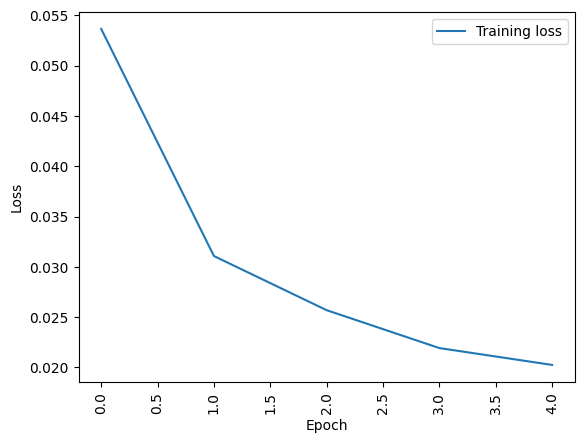

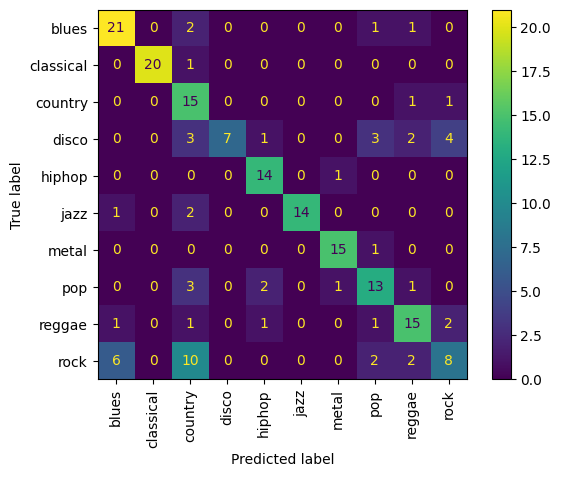

In [5]:
from fine_tune_audio_classification import FineTuneAudioClassifier
import torch.nn as nn


metadata_path = "audios/GTZAN/features_30_sec.csv"
audio_dir = "audios/GTZAN/genres_original"
dataset_class = 'GTZAN'
model_id = "laion/larger_clap_music_and_speech"

class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x
# Create an instance of FineTuneAudioClassifier
gtzan_fine_tune = FineTuneAudioClassifier(metadata_path, audio_dir, dataset_class, model_id)

# Define the MLP classifier model
input_size = 512  # 512 input features Emmbeding
hidden_size = 256  
output_size = gtzan_fine_tune.num_classes
classifier_gtzan_fine_tune = MLPClassifier(input_size, hidden_size, output_size)

# Train the model
train_losses_gtzan_fine_tune= gtzan_fine_tune.train(
    classifier_gtzan_fine_tune, 
    num_epochs=5,
    name_of_model_to_save="gtzan_fine_tune_model.pth"
)

# Evaluate the model
avg_loss_gtzan_fine_tune, accuracy_gtzan_fine_tune, true_labels_gtzan_fine_tune, pred_labels_gtzan_fine_tune = gtzan_fine_tune.evaluate(
    classifier_gtzan_fine_tune
)

# Plot loss and confusion matrix
gtzan_fine_tune.plot_loss(train_losses_gtzan_fine_tune)
gtzan_fine_tune.plot_confusion_matrix(true_labels_gtzan_fine_tune, pred_labels_gtzan_fine_tune)

## Sentiments in Music Fine Tune

### 2 epochs 1 Linear Layer

Running MusicSentiment dataset with lenght: 1626 classifying this number of clases: ['epic' 'happy' 'sad' 'suspense']
Classes in the test set: {'sad', 'happy', 'epic', 'suspense'}
Classes in the test set: {'sad', 'happy', 'suspense', 'epic'}


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [1/2], Training Loss: 0.02293645042639512
Classes in the test set: {'sad', 'happy', 'epic', 'suspense'}
Classes in the test set: {'sad', 'happy', 'suspense', 'epic'}


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [2/2], Training Loss: 0.00889782468859966
Total training time: 294.7088711261749 seconds


  0%|          | 0/11 [00:00<?, ?it/s]

During Evaluation in unseen data metrics are -> Average loss: 0.007081550688831353, Accuracy: 0.9723926380368099


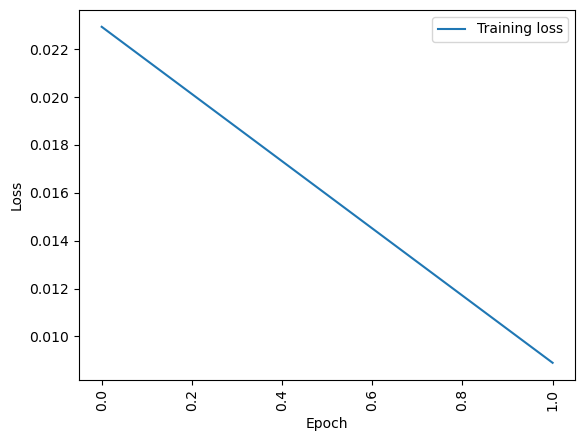

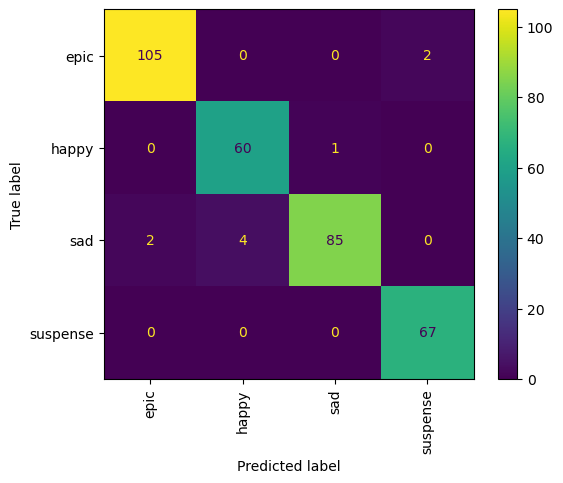

In [17]:

from fine_tune_audio_classification import FineTuneAudioClassifier
import torch.nn as nn
metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/SentimentsDataSet/all_music_labels.csv"
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/SentimentsDataSet/"
dataset_class = 'MusicSentiment'
model_id = "laion/larger_clap_music_and_speech"
MusicSentiment_fine_tune = FineTuneAudioClassifier(metadata_path, audio_dir, dataset_class, model_id)

#Define the classifier model
classifier_MusicSentiment_fine_tune = nn.Linear(512, MusicSentiment_fine_tune.num_classes)

# Train the model
train_losses_MusicSentiment_fine_tune = MusicSentiment_fine_tune.train(classifier_MusicSentiment_fine_tune, num_epochs=2)

# Evaluate the model
avg_loss_MusicSentiment_fine_tune, accuracy_MusicSentiment_fine_tune, true_labels_MusicSentiment_fine_tune, pred_labels_MusicSentiment_fine_tune = MusicSentiment_fine_tune.evaluate(classifier_MusicSentiment_fine_tune)

# train_losses, valid_losses, elapsed_time = fine_tune_audio_classifier.train(classifier)
MusicSentiment_fine_tune.plot_loss(train_losses_MusicSentiment_fine_tune)
MusicSentiment_fine_tune.plot_confusion_matrix(true_labels_MusicSentiment_fine_tune, pred_labels_MusicSentiment_fine_tune)

### 2 epochs 2 Layers Relu 

Running MusicSentiment dataset with lenght: 1626 classifying this number of clases: ['epic' 'happy' 'sad' 'suspense']
Classes in the test set: {'happy', 'epic', 'sad', 'suspense'}
Classes in the test set: {'happy', 'sad', 'suspense', 'epic'}


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [1/5], Training Loss: 0.008895197645402872
Classes in the test set: {'happy', 'epic', 'sad', 'suspense'}
Classes in the test set: {'happy', 'sad', 'suspense', 'epic'}


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [2/5], Training Loss: 0.0022927599411027935
Classes in the test set: {'happy', 'epic', 'sad', 'suspense'}
Classes in the test set: {'happy', 'sad', 'suspense', 'epic'}


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [3/5], Training Loss: 0.0013397294898123409
Classes in the test set: {'happy', 'epic', 'sad', 'suspense'}
Classes in the test set: {'happy', 'sad', 'suspense', 'epic'}


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [4/5], Training Loss: 0.000817595761305151
Classes in the test set: {'happy', 'epic', 'sad', 'suspense'}
Classes in the test set: {'happy', 'sad', 'suspense', 'epic'}


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch [5/5], Training Loss: 0.0008380816347646312
Total training time: 533.2435982227325 seconds


  0%|          | 0/11 [00:00<?, ?it/s]

During Evaluation in unseen data metrics are -> Average loss: 0.004178450355717649, Accuracy: 0.9631901840490797


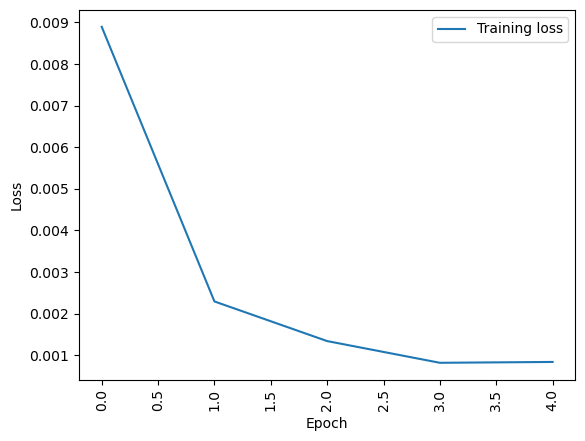

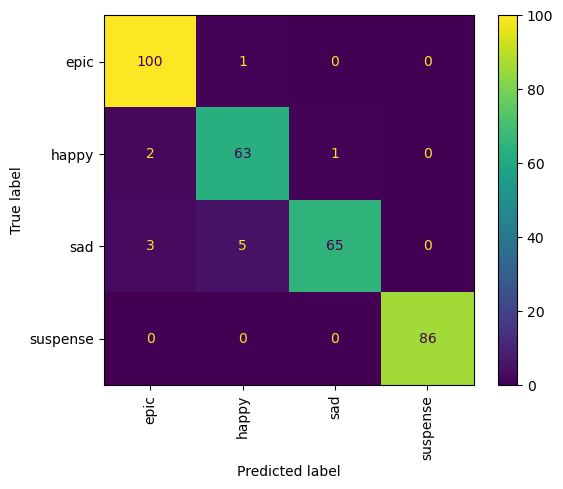

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from fine_tune_audio_classification import FineTuneAudioClassifier

class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/SentimentsDataSet/all_music_labels.csv"
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/SentimentsDataSet/"
dataset_class = 'MusicSentiment'
model_id = "laion/larger_clap_music_and_speech"

# Create an instance of FineTuneAudioClassifier
MusicSentiment_fine_tune = FineTuneAudioClassifier(metadata_path, audio_dir, dataset_class, model_id)

# Define the MLP classifier model
input_size = 512  # 512 input features Emmbeding
hidden_size = 256  
output_size = MusicSentiment_fine_tune.num_classes
classifier_MusicSentiment_fine_tune = MLPClassifier(input_size, hidden_size, output_size)

# Train the model
train_losses_MusicSentiment_fine_tune= MusicSentiment_fine_tune.train(
    classifier_MusicSentiment_fine_tune, 
    num_epochs=5, 
)

# Evaluate the model
avg_loss_MusicSentiment_fine_tune, accuracy_MusicSentiment_fine_tune, true_labels_MusicSentiment_fine_tune, pred_labels_MusicSentiment_fine_tune = MusicSentiment_fine_tune.evaluate(
    classifier_MusicSentiment_fine_tune
)

# Plot loss and confusion matrix
MusicSentiment_fine_tune.plot_loss(train_losses_MusicSentiment_fine_tune)
MusicSentiment_fine_tune.plot_confusion_matrix(true_labels_MusicSentiment_fine_tune, pred_labels_MusicSentiment_fine_tune)


## Music Genres Classification Finetune

Running MusicGen dataset with lenght: 2500 classifying this number of clases: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Classes in the test set: {'jazz', 'metal', 'rock', 'reggae', 'hiphop', 'country', 'blues', 'pop', 'disco', 'classical'}
Classes in the test set: {'jazz', 'metal', 'rock', 'reggae', 'hiphop', 'country', 'blues', 'pop', 'disco', 'classical'}


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch [1/5], Training Loss: 0.01939756904914975
Classes in the test set: {'jazz', 'metal', 'rock', 'reggae', 'hiphop', 'country', 'blues', 'pop', 'disco', 'classical'}
Classes in the test set: {'jazz', 'metal', 'rock', 'reggae', 'hiphop', 'country', 'blues', 'pop', 'disco', 'classical'}


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch [2/5], Training Loss: 0.004563783510588109
Classes in the test set: {'jazz', 'metal', 'rock', 'reggae', 'hiphop', 'country', 'blues', 'pop', 'disco', 'classical'}
Classes in the test set: {'jazz', 'metal', 'rock', 'reggae', 'hiphop', 'country', 'blues', 'pop', 'disco', 'classical'}


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch [3/5], Training Loss: 0.002862740826793015
Classes in the test set: {'jazz', 'metal', 'rock', 'reggae', 'hiphop', 'country', 'blues', 'pop', 'disco', 'classical'}
Classes in the test set: {'jazz', 'metal', 'rock', 'reggae', 'hiphop', 'country', 'blues', 'pop', 'disco', 'classical'}


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch [4/5], Training Loss: 0.0021271926880581304
Classes in the test set: {'jazz', 'metal', 'rock', 'reggae', 'hiphop', 'country', 'blues', 'pop', 'disco', 'classical'}
Classes in the test set: {'jazz', 'metal', 'rock', 'reggae', 'hiphop', 'country', 'blues', 'pop', 'disco', 'classical'}


  0%|          | 0/63 [00:00<?, ?it/s]

Epoch [5/5], Training Loss: 0.0020442790086381136
Total training time: 1092.8865206241608 seconds


  0%|          | 0/16 [00:00<?, ?it/s]

During Evaluation in unseen data metrics are -> Average loss: 0.005299679521471262, Accuracy: 0.952


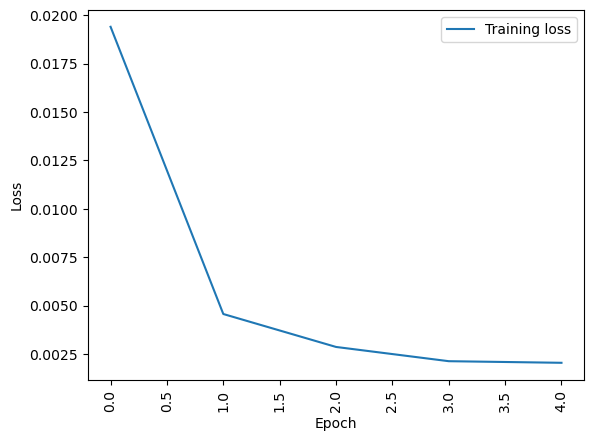

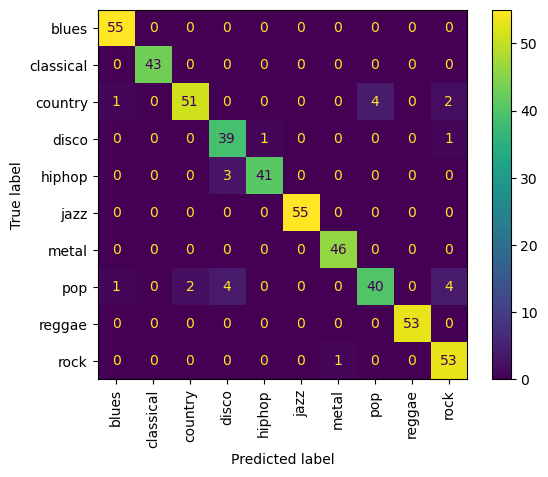

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from fine_tune_audio_classification import FineTuneAudioClassifier

class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

metadata_path = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/all_music_labels.csv"
audio_dir = "/homes/r23ferna/Documents/Deep-Learning-CLAP/audios/GenresDataSet200Samp/"
dataset_class = 'MusicGen'
model_id = "laion/larger_clap_music_and_speech" 

# Create an instance of FineTuneAudioClassifier
MusicGen_fine_tune = FineTuneAudioClassifier(metadata_path, audio_dir, dataset_class, model_id)

# Define the MLP classifier model
input_size = 512  # 512 input features Emmbeding
hidden_size = 256  
output_size = 10
classifier_MusicGen_fine_tune = MLPClassifier(input_size, hidden_size, output_size)

# Train the model
train_losses_MusicGen_fine_tune = MusicGen_fine_tune.train(
    classifier_MusicGen_fine_tune, 
    num_epochs=5, 
)

# Evaluate the model
avg_loss_MusicGen_fine_tune, accuracy_MusicGen_fine_tune, true_labels_MusicGen_fine_tune, pred_labels_MusicGen_fine_tune = MusicGen_fine_tune.evaluate(
    classifier_MusicGen_fine_tune
)

# Plot loss and confusion matrix
MusicGen_fine_tune.plot_loss(train_losses_MusicGen_fine_tune)
MusicGen_fine_tune.plot_confusion_matrix(true_labels_MusicGen_fine_tune, pred_labels_MusicGen_fine_tune)

# Discussion

As we already run all the experiments, we will now perform an analysis of the outputs, trying to identify posible leaks or potential failures the model might have:

## Sentiments in music Finetune analysis

Sentiment is a subjective feature of a song, so we were interested in view if the model itself could identify paterns from the embeding to categorize. As we can se in the code blocks presented above, we achieve to increase from *61%* to *97%* accuracy, so now we will try to perform using ` .predict ` with completly new data to test in a subjective way if the model is at some point generalizing properly. 

In [21]:
# Sentiment analysis for Yellow Submarine from the Beatles


audio_path = '/homes/r23ferna/Téléchargements/The Beatles Yellow Submarine.mp3'
MusicSentiment_fine_tune.predict(audio_path,classifier_MusicSentiment_fine_tune)

The predicted class for the audio file /homes/r23ferna/Téléchargements/The Beatles Yellow Submarine.mp3 is happy.


In [25]:
audio_path = '/homes/r23ferna/Téléchargements/joji-glimpse of us.mp3'
MusicSentiment_fine_tune.predict(audio_path,classifier_MusicSentiment_fine_tune)

The predicted class for the audio file /homes/r23ferna/Téléchargements/joji-glimpse of us.mp3 is sad.


As we can see in the blocks above, when we use evident, but new data, we achieve to categorize the audios correctly.

In [24]:
# Tears in heaven from eric clapton, Sad might be expected in general
audio_path = '/homes/r23ferna/Téléchargements/Eric Clapton-Tears In Heaven.mp3'
MusicSentiment_fine_tune.predict(audio_path,classifier_MusicSentiment_fine_tune)

The predicted class for the audio file /homes/r23ferna/Téléchargements/Eric Clapton-Tears In Heaven.mp3 is happy.


In [27]:
audio_path = '/homes/r23ferna/Téléchargements/Radiohead Creep.mp3'
MusicSentiment_fine_tune.predict(audio_path,classifier_MusicSentiment_fine_tune)

The predicted class for the audio file /homes/r23ferna/Téléchargements/Radiohead Creep.mp3 is happy.


As we can see in here, even though the lyrics and the human feeling of this song are sad even the name, the rythm is just calm and even a little happy, this kind of confussions appear if we keep doing tests, nevertheless, we can also imply and infer that a bigger and maybe more diverse data set, might get better results, since this is only trained by 4 sentiments, and only one hour of data per category.

## Genres classification finetune analysis

Similar to the sentiments, we run a simple test for testing if it is generalizing for genre identification of a song. Is worth to add that the audios we are using as inputs are full songs, while the tranches for the training were 10 seconds clips; in this matter, we expect from the audio embedding to extract all the features and categorize full songs, since is very probable that is a more real world use case.

In [28]:
audio_path = '/homes/r23ferna/Téléchargements/Donna Summer  On The Radio.mp3'
MusicGen_fine_tune.predict(audio_path,classifier_MusicGen_fine_tune)

The predicted class for the audio file /homes/r23ferna/Téléchargements/Donna Summer  On The Radio.mp3 is disco.


In [39]:
audio_path = "/homes/r23ferna/Téléchargements/BLACK SABBATH-Sabbath Bloody Sabbath.mp3"
MusicGen_fine_tune.predict(audio_path,classifier_MusicGen_fine_tune)

The predicted class for the audio file /homes/r23ferna/Téléchargements/BLACK SABBATH-Sabbath Bloody Sabbath.mp3 is rock.


In [34]:
audio_path = '/homes/r23ferna/Téléchargements/The Beatles Yellow Submarine.mp3'
MusicGen_fine_tune.predict(audio_path,classifier_MusicGen_fine_tune)

The predicted class for the audio file /homes/r23ferna/Téléchargements/The Beatles Yellow Submarine.mp3 is rock.


In [50]:
audio_path = '/homes/r23ferna/Téléchargements/Radiohead Creep.mp3'
MusicGen_fine_tune.predict(audio_path,classifier_MusicGen_fine_tune)

The predicted class for the audio file /homes/r23ferna/Téléchargements/Radiohead Creep.mp3 is metal.
